# Unconstrained Optimization

This section provides implementations for concepts related to local *unconstrained* optimization. We will be using `scipy.optimize` module for minimizing an example function. Going through the following documentation will help in understanding the code:

1. [Scipy minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
2. [Matplotlib Contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

Below block of code imports all the required packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.colors as colors

Consider the bean function described below:

$$
    f(x_1,x_2) = (1 - x_1)^2 + (1 - x_2)^2 + \frac{1}{2}(2x_2 - x_1^2)^2
$$

**Question**: Plot the function contours.

**Answer**: Below block of code defines couple of functions - one for computing function value at any given $x$ and another for plotting contours. Read comments for more details.

In [3]:
def bean_function(x):
    """
        Function which calculates the bean function value at given x.
        
        Input:
        x - a 1D/2D numpy array of shape (2,) or (1,2)
    """

    # Number of dimensions of input
    dim = x.ndim

    # Converting to 2D numpy array if input is 1D
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]

    y = (1 - x1)**2 + (1 - x2)**2 + (2*x2 - x1**2)**2 / 2
    
    if dim == 1:
        y = y.reshape(-1,)

    return y

def plot_bean_function():
    """
        Function which plots the bean function

        Returns ax object which can be used to plot
        other things on the same plot.
    """

    num_points = 100

    # Defining x and y values
    x = np.linspace(-2,2,num_points)
    y = np.linspace(-1,3,num_points)

    # Creating a mesh at which values will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = bean_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    # Contour levels are evaluated in logscale since the difference
    # between minimum and maximum value of function is large.
    noOfLevels = 30
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

    # Defining normalization which is used to normalize the function values
    # before mapping with color. We need to use this since levels for contour
    # is defined on log scale
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    fig.colorbar(CS, format='%.2e', orientation='vertical')
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Bean Function", fontsize=14)

    return ax

Below block of code makes a contour plot of bean function using the functions defined in previous block:

<Axes: title={'center': 'Bean Function'}, xlabel='$x_1$', ylabel='$x_2$'>

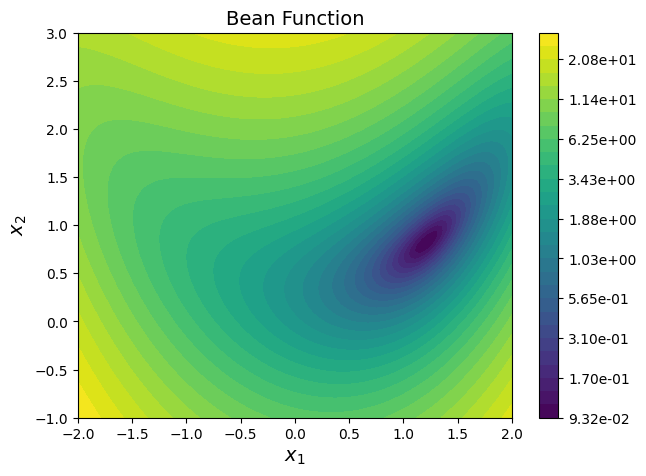

In [4]:
plot_bean_function()

**Question**: Use *Conjugate Gradient* and *BFGS* method for solving following optimization problem:

$$
   \min_{x_1,x_2} f(x_1,x_2) = (1 - x_1)^2 + (1 - x_2)^2 + \frac{1}{2}(2x_2 - x_1^2)^2
$$

**Answer**: Below block of code defines two functions which are used irrespective of the optimization method. First one is used to store optimization history and last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [12]:
def bean_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value which is later
        for plotting convergence history.
        
        Input: 1d numpy array which contains current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(bean_function(x))
    
def bean_func_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dictionary which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A string which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)

    ax = plot_bean_function()
    ax.scatter(x0[0], x0[1], label="Starting point", c="red")
    ax.scatter(result.x[0], result.x[1], label="Final point", c="orange")
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.set_title("Path of optimizer - " + method, fontsize=14)
    ax.legend()

Below block of code defines various parameters for optimization using **Conjugate Gradient** method.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 90
         Gradient evaluations: 18
Value of x1 at optimum: 1.2134116592747848
Value of x2 at optimum: 0.8241226173724079


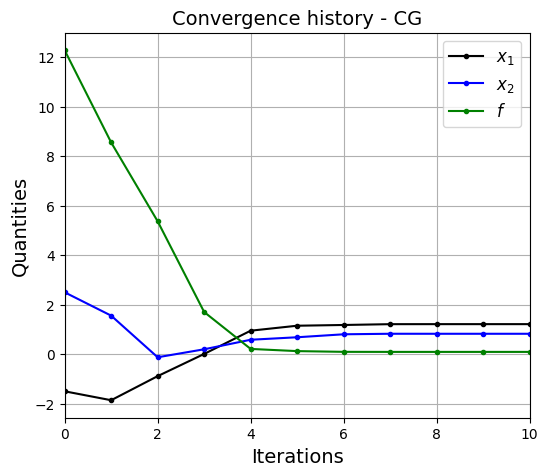

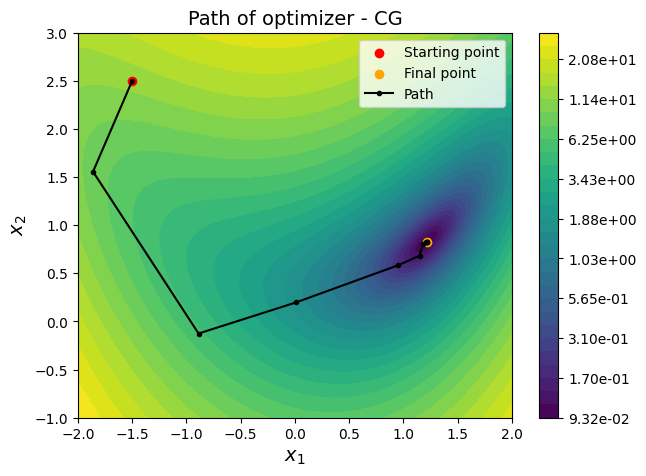

In [19]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "CG"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_function(x0)]

# Solver options
options ={"disp": True}

# Minimize the function
result = minimize(fun=bean_function, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

> **_NOTE:_** Contour is only plotted for $x_1 \in [-2,2]$ and $x_2 \in [-1,3]$. But *the optimization process is not bounded by this range*, it can go beyond this range. Morevoer, *Conjugate gradient* and *BFGS* methods cannot handle bounds on variables. For example, try (-2,3) as the starting point and you will see that the optimization process goes beyond the range of contour plot. You can change the range of values for $x_1$ and $x_2$ in the function `plot_bean_function` defined above.

It is recommended that you change various optimization settings and see how it affects the optimization. For example, you can change the `initial guess` or `jac` and note how number of function and gradient evaluations change.

Below block of code defines various parameters for optimization using **BFGS** method. Only the `method` variable is changed to `BFGS` and rest of the parameters are same as above.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 60
         Gradient evaluations: 12
Value of x1 at optimum: 1.2134128900699837
Value of x2 at optimum: 0.8241227928676157


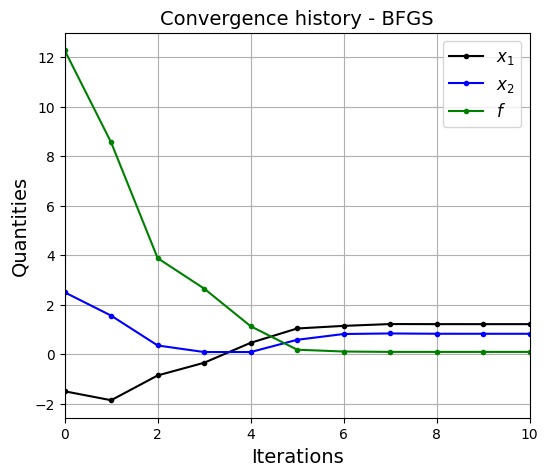

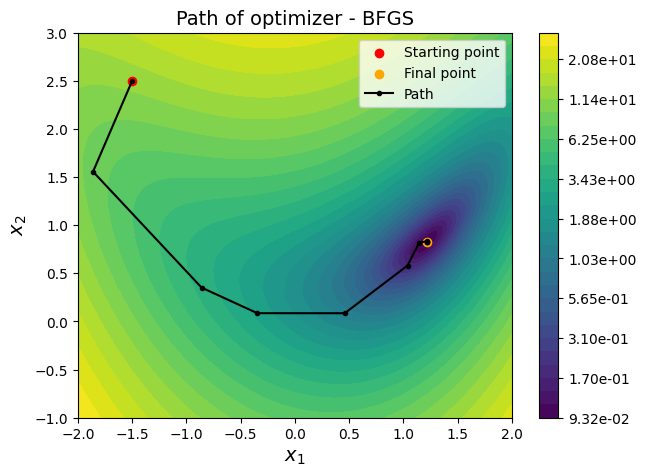

In [18]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_function(x0)]

# Solver options
options ={"disp": True}

# Minimize the function
result = minimize(fun=bean_function, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

> **_NOTE:_** `BFGS` method finds optimum solution with less number of function evaluations as compared to `Conjugate Gradient` method. This is because `BFGS` method uses $2^{nd}$ gradient (approximation), along with $1^{st}$ gradient and function information to find the optimum solution. While `Conjugate Gradient` method only uses $1^{st}$ gradient and function information.

**Few comments**:

* The number of iterations taken by CG is more than BFGS when all other settings are same.
* Function evaluations is greater than number of iterations since gradient is evaluated using finite difference. You can also provide python function which outputs analytical gradient values to optimizer which will decrease the function evaluations.
* When you change `jac` to "3-point", you will notice that number of function evaluations increases since central difference requries more function evaluations.
* You can also use other methods like *Newton-CG*, but you will need to give exact values of gradient vector and it will compute hessian matrix using finite difference techniques.